#  RecSys Jester dataset

Building a RecSys for the Jester dataset

This dataset is full of jokes (literally). It contains about 150 different jokes. The aim is building a RecSys so users will be recommend jokes suited to them.

**Researcher**<br>
David Kakanis - 500783676<br>

### Research question  
How can we create a personalized joke recommendation system using the Jester dataset that maximizes user satisfaction, measured by the user's joke ratings?

Sub-questions:

1. What are the characteristics of jokes with high ratings? Are there any common patterns in the joke text or length? How does the sentiment of the joke text relate to user ratings?
2. How does the performance of KNN and SVD collaborative filtering techniques compare in terms of recommendation accuracy and user satisfaction? 
3. Which features are the most important in predicting a user's rating for a joke? 
4. Can the developed RecSys models provide meaningful explanations for their recommendations based on the joke content or user preferences?

### Introduction
The purpose of this data analysis is to develop a personalized joke recommendation system using the Jester dataset. By understanding users' preferences and the characteristics of jokes with high ratings, we can create a recommendation system that maximizes user satisfaction.

In order to draw valid conclusions and answer the main research question, we have formulated several sub-questions. These sub-questions will be answered by developing hypotheses and testing them using various statistical techniques and machine learning models, such as KNN and SVD collaborative filtering techniques.

By exploring these sub-questions and their results, we can better understand the factors that contribute to the success of a joke recommendation system and optimize it to provide the best possible user experience.

### Index
1. Importing data
2. Data Cleaning and Preprocessing
3. Exploratory Data Analysis
4. Sentiment Analysis
5. Collaborative Filtering Models (KNN and SVD)
6. Conclusion



# 1) Importing data

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from math import sqrt
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split


In [3]:
#Reading the first CSV file
df1 = pd.read_csv(r"C:\Users\User\iCloudDrive\Master DDB\RecSys\JesterDataset\jester_ratings.csv", encoding='utf-8', delimiter=',')

In [4]:
df1.sample(10)

,userId,jokeId,rating
362834,13908,30,7.438
1287895,46460,13,-6.438
752394,31132,78,2.594
1528582,54876,110,-9.562
437757,17122,92,5.156
1358451,48358,110,-1.750
458112,17783,17,9.062
58791,1552,69,2.312
392720,15084,109,-9.344
1471609,52484,72,7.250


In [4]:
# reading second CSV file
df2 = pd.read_csv(r"C:\Users\User\iCloudDrive\Master DDB\RecSys\JesterDataset\jester_items.csv", encoding='utf-8', delimiter=',')

In [44]:
df2.sample(10)

,jokeId,jokeText
66,67,"Once upon a time, two brooms fell in love and ..."
33,34,"Out in the backwoods of some midwestern state,..."
13,14,The father was very anxious to marry off his o...
103,104,"As a pre-med student, I had to take a difficul..."
51,52,Q: What do Monica Lewinsky and Bob Dole have i...
119,120,"Judy was having trouble with her computer, so ..."
144,145,"A blonde, brunette, and a red head are all lin..."
125,126,"A Briton, a Frenchman and a Russian are viewin..."
95,96,Two attorneys went into a diner and ordered tw...
116,117,A man joins a big corporate empire as a traine...


# 2) Data Cleaning and Preprocessing

count     150.000000
mean      379.613333
std       286.383298
min        52.000000
25%       136.000000
50%       318.500000
75%       538.500000
max      1326.000000
Name: jokeText, dtype: float64

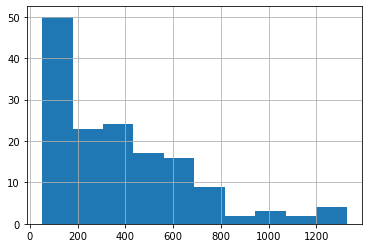

In [7]:
#jokeText in df2
df2['jokeText'].str.len().hist()

df2['jokeText'].str.len().describe()

In [8]:
#An example of text from jokeText
df2['jokeText'][0]

'A man visits the doctor. The doctor says "I have bad news for you.You have\ncancer and Alzheimer\'s disease". \nThe man replies "Well,thank God I don\'t have cancer!"\n'

In [45]:
# merging the two datasets
data = df1.merge(df2, on='jokeId')


In [52]:
data.sample(10)

,userId,jokeId,rating,jokeText
946693,36057,128,-5.094,"An American, a Scot and a Canadian were in a t..."
1262487,36253,84,8.438,Q: What is the difference between Mechanical E...
1238895,32883,46,1.531,A couple has been married for 75 years. For th...
510020,30403,50,1.656,A guy goes into confession and says to the pri...
99112,43191,8,-8.062,Q. Did you hear about the dyslexic devil worsh...
263968,41104,16,1.000,Q. What is orange and sounds like a parrot? \...
1519812,44153,129,8.312,A group of girlfriends is on vacation when the...
1636010,1142,139,-9.688,"In a Veteran's Day speech, President Bush vowe..."
23361,24761,7,-4.250,How many feminists does it take to screw in a ...
561909,31371,105,9.844,A couple of hunters are out in the woods in th...


In [143]:
# saving the merged dataset to a parquet file
data.to_parquet('jester.parquet')

# 3) Exploratory Data Analysis (EDA)

EDA for Netflix dataset

In this chapter, we conduct an Exploratory Data Analysis (EDA) to better understand the Netflix movie dataset. The goal is to understand the data available and what we can use as features for a recommendation model.

The followings steps will be taken:

1. Overview of the dataset: Get a general understanding of the dataset by looking at the number of rows, columns, and data types. Use the info() and describe() functions in pandas to get a quick summary of the dataset.

2. Univariate analysis: Univariate analysis involves examining individual variables in the dataset. This helps me understand the distribution and characteristics of each variable. For continuous variables, such as movie ratings or duration, I can create histograms or density plots to visualize the distribution.

3. Multivariate analysis: Multivariate analysis investigates the relationships between multiple variables in the dataset. This helps me understand how variables interact with each other and can reveal patterns or trends that may not be apparent when looking at individual variables. I will do an correlation analysis using a heatmap.

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761439 entries, 0 to 1761438
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   userId    int64  
 1   jokeId    int64  
 2   rating    float64
 3   jokeText  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 67.2+ MB


In [53]:
data.describe()

,userId,jokeId,rating
count,1.761439e+06,1.761439e+06,1.761439e+06
mean,3.272322e+04,7.071133e+01,1.618602e+00
std,1.828011e+04,4.600790e+01,5.302608e+00
min,1.000000e+00,5.000000e+00,-1.000000e+01
25%,1.720200e+04,2.100000e+01,-2.031000e+00
50%,3.480800e+04,6.900000e+01,2.219000e+00
75%,4.730600e+04,1.120000e+02,5.719000e+00
max,6.397800e+04,1.500000e+02,1.000000e+01




On average, users have given ratings to 71 jokes, with an average rating of 1.62 and a standard deviation of 5.3, meaning that the ratings vary quite a bit. With 150 unique jokes.

In [54]:
# amount of user ids
data['userId'].nunique()

59132

In [28]:
# Calculate summary statistics for the ratings
print("Ratings summary statistics:")
print(data['rating'].describe())

# Calculate average ratings for jokes
average_ratings = data.groupby('jokeId')['rating'].mean()

# Identify the highest-rated jokes
highest_rated_jokes = average_ratings.sort_values(ascending=False).head(10)
print("Top 10 highest-rated jokes:")
print(highest_rated_jokes)

Ratings summary statistics:
count    1.761439e+06
mean     1.618602e+00
std      5.302608e+00
min     -1.000000e+01
25%     -2.031000e+00
50%      2.219000e+00
75%      5.719000e+00
max      1.000000e+01
Name: rating, dtype: float64
Top 10 highest-rated jokes:
jokeId
53     3.714381
105    3.711223
89     3.606506
129    3.583496
35     3.560305
72     3.505712
32     3.504739
104    3.422796
68     3.387269
106    3.337933
Name: rating, dtype: float64


 The summary statistics show that the average rating is 1.62 with a standard deviation of 5.30. The highest average rating of 3.71.

C:\Users\User\AppData\Local\Temp\ipykernel_8152\3150323307.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(x) for x in ax.get_xticks()], fontsize=4)
C:\Users\User\AppData\Local\Temp\ipykernel_8152\3150323307.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) for y in ax.get_yticks()], fontsize=4)


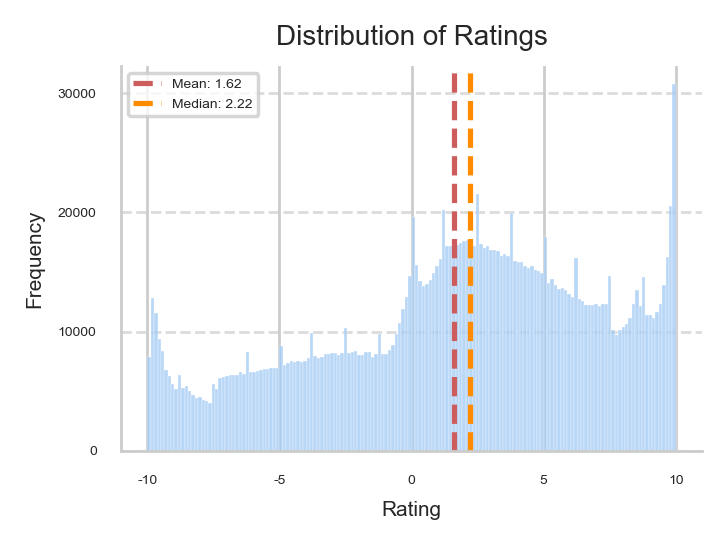

In [39]:
# Setting style and color palette
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Visualize the distribution of ratings using a histogram
fig, ax = plt.subplots(figsize=(3, 2), dpi=250)
sns.histplot(data['rating'], kde=False, ax=ax)

# Set x and y labels and title with smaller font sizes
ax.set_xlabel('Rating', fontsize=6)
ax.set_ylabel('Frequency', fontsize=6)
ax.set_title('Distribution of Ratings', fontsize=8)

# Remove spines on the right and top sides
sns.despine(right=True, top=True)

# Add mean and median lines
mean = data['rating'].mean()
median = data['rating'].median()
ax.axvline(mean, color='indianred', linestyle='--', label=f'Mean: {mean:.2f}')
ax.axvline(median, color='darkorange', linestyle='--', label=f'Median: {median:.2f}')
ax.legend(fontsize=4)

# Add gridlines and adjust tick labels with smaller font sizes
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels([int(x) for x in ax.get_xticks()], fontsize=4)
ax.set_yticklabels([int(y) for y in ax.get_yticks()], fontsize=4)

# Show plot
plt.show()


The histogram shows the distribution of ratings given to jokes, where the x-axis represents the rating and the y-axis represents the frequency. The median of the distribution is 2.22, which means that half of the ratings are above 2.22 and half are below. The mean of the distribution is 1.62, which is less than the median, indicating that the distribution is skewed towards the lower ratings.

C:\Users\User\AppData\Local\Temp\ipykernel_8152\3465825136.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(x) for x in ax.get_xticks()], fontsize=4)
C:\Users\User\AppData\Local\Temp\ipykernel_8152\3465825136.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) for y in ax.get_yticks()], fontsize=4)


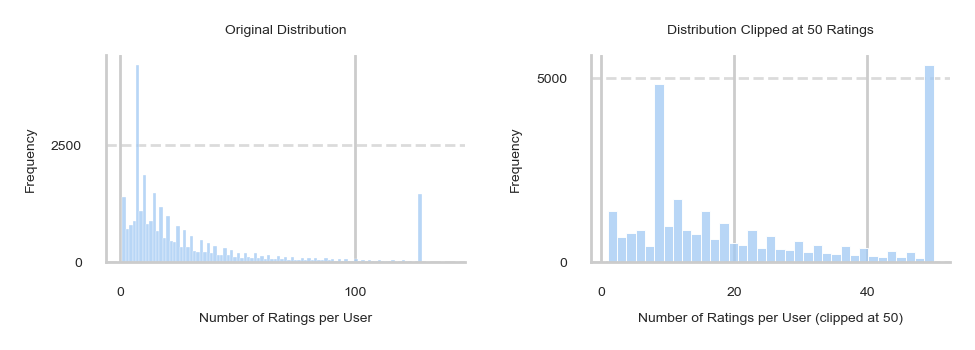

In [47]:
# Count the number of ratings each user gave
ratings_per_user = data['userId'].value_counts()
ratings_per_user_clipped = ratings_per_user.clip(upper=50)

# Create a 1x2 grid of plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(4, 1.5), dpi=250)

# Plot the original histogram
sns.histplot(ratings_per_user, kde=False, ax=axes[0])
axes[0].set_xlabel('Number of Ratings per User', fontsize=4)
axes[0].set_ylabel('Frequency', fontsize=4)
axes[0].set_title('Original Distribution', fontsize=4)

# Plot the clipped histogram
sns.histplot(ratings_per_user_clipped, kde=False, ax=axes[1])
axes[1].set_xlabel('Number of Ratings per User (clipped at 50)', fontsize=4)
axes[1].set_ylabel('Frequency', fontsize=4)
axes[1].set_title('Distribution Clipped at 50 Ratings', fontsize=4)

# Remove spines on the right and top sides
sns.despine(right=True, top=True)

# Add gridlines and adjust tick labels
for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticklabels([int(x) for x in ax.get_xticks()], fontsize=4)
    ax.set_yticklabels([int(y) for y in ax.get_yticks()], fontsize=4)

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8152\3177973285.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(x) for x in ax.get_xticks()], fontsize=8)
C:\Users\User\AppData\Local\Temp\ipykernel_8152\3177973285.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) for y in ax.get_yticks()], fontsize=8)


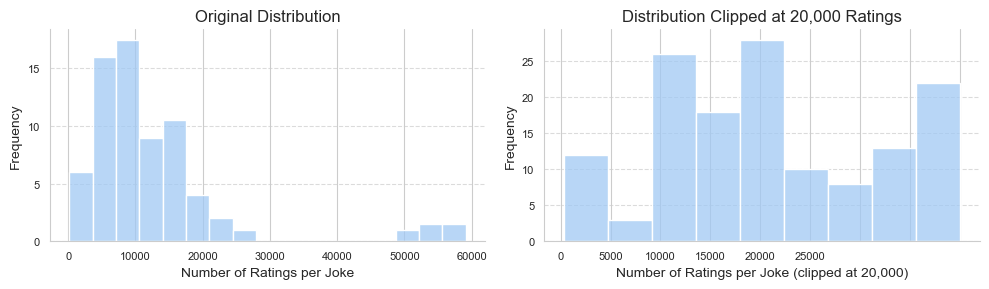

In [49]:
# Count the number of ratings each joke received
ratings_per_joke = data['jokeId'].value_counts()
ratings_per_joke_clipped = ratings_per_joke.clip(upper=20000)

# Create a 1x2 grid of plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), dpi=100)

# Plot the original histogram
sns.histplot(ratings_per_joke, kde=False, ax=axes[0])
axes[0].set_xlabel('Number of Ratings per Joke', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)
axes[0].set_title('Original Distribution', fontsize=12)

# Plot the clipped histogram
sns.histplot(ratings_per_joke_clipped, kde=False, ax=axes[1])
axes[1].set_xlabel('Number of Ratings per Joke (clipped at 20,000)', fontsize=10)
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].set_title('Distribution Clipped at 20,000 Ratings', fontsize=12)

# Remove spines on the right and top sides
sns.despine(right=True, top=True)

# Add gridlines and adjust tick labels
for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticklabels([int(x) for x in ax.get_xticks()], fontsize=8)
    ax.set_yticklabels([int(y) for y in ax.get_yticks()], fontsize=8)

plt.tight_layout()
plt.show()


# 4) Adding sentiment analysis

Did not use but wanted to keep for future research

In [13]:
from textblob import TextBlob

In [14]:
# Assuming your dataset is in a DataFrame called df
# Perform sentiment analysis on the 'jokeText' column
data['sentiment'] = data['jokeText'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [15]:
# Display the updated DataFrame with sentiment scores
data.head(10)

,userId,jokeId,rating,jokeText,sentiment
0,1,5,0.219,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
1,2,5,-9.688,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
2,3,5,-9.844,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
3,4,5,-5.812,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
4,5,5,6.906,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
5,6,5,-0.031,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
6,7,5,-2.906,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
7,8,5,6.219,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
8,9,5,8.250,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
9,10,5,-5.750,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0


In [16]:
#make new dataframe with only jokeId and sentiment

data2 = data[['jokeId', 'sentiment']]
data2.sample(10)

,jokeId,sentiment
365692,18,0.005177
476656,25,0.000000
1554857,131,-0.061222
360875,18,0.005177
324333,17,0.450000
510014,50,0.241667
398016,19,0.000000
164734,13,0.000000
1145867,44,-0.050000
1445694,114,-0.066667


In [20]:
#save data to parquet

data.to_parquet('jester2.parquet')

In [3]:
#load data from parquet

data = pd.read_parquet('jester2.parquet')

In [18]:
# Calculate average sentiment for jokes
average_sentiment = data2.groupby('jokeId')['sentiment'].mean()

# Identify the most positive jokes
most_positive_jokes = average_sentiment.sort_values(ascending=False).head(10)
print("Top 10 most positive jokes:", most_positive_jokes)

# Identify the most negative jokes
most_negative_jokes = average_sentiment.sort_values(ascending=True).head(10)
print("Top 10 most negative jokes:", most_negative_jokes)

# Calculate average ratings for jokes
average_ratings = data.groupby('jokeId')['rating'].mean()

Top 10 most positive jokes: jokeId
146    1.000000
43     0.800000
80     0.750000
22     0.750000
108    0.688095
124    0.641667
90     0.625000
57     0.500000
17     0.450000
85     0.433333
Name: sentiment, dtype: float64
Top 10 most negative jokes: jokeId
15    -0.500000
132   -0.445833
59    -0.266667
121   -0.265079
138   -0.250000
61    -0.235786
104   -0.221667
111   -0.194602
56    -0.181934
92    -0.180000
Name: sentiment, dtype: float64


In [19]:
# Calculate the correlation between the sentiment and rating
correlation = data['sentiment'].corr(data['rating'])
print(f"Correlation between sentiment and rating: {correlation:.2f}")

Correlation between sentiment and rating: 0.02


In [28]:
#count amount of sentiment with 0.00

data['sentiment'].value_counts(0)

 0.000000    413777
 0.258333     63728
-0.500000     54932
 0.450000     53357
 0.005177     51587
              ...  
 0.281481       368
-0.235786       222
 0.102806       166
 0.136364       166
 0.800000       166
Name: sentiment, Length: 103, dtype: int64

In [21]:
# Create bins with a step of 0.2
bins = pd.cut(data['sentiment'], bins=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Calculate the value counts for each bin
sentiment_counts = data.groupby(bins)['sentiment'].count()

# Calculate the percentage of each bin
sentiment_percentages = sentiment_counts / data.shape[0] * 100

# Print the sentiment percentages
print(sentiment_percentages)


sentiment
(-1.0, -0.8]     0.000000
(-0.8, -0.6]     0.000000
(-0.6, -0.4]     4.036927
(-0.4, -0.2]     3.165934
(-0.2, 0.0]     40.752192
(0.0, 0.2]      31.862017
(0.2, 0.4]      14.326922
(0.4, 0.6]       3.610173
(0.6, 0.8]       1.966915
(0.8, 1.0]       0.278920
Name: sentiment, dtype: float64


In [4]:
data.head()

,userId,jokeId,rating,jokeText,sentiment
0,1,5,0.219,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
1,2,5,-9.688,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
2,3,5,-9.844,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
3,4,5,-5.812,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
4,5,5,6.906,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0


## 4) Analysis

In [40]:
#how many jokes are rated by a random user

data['userId'].value_counts(0)

304      140
476      140
477      140
701      140
227      140
        ... 
55059      1
55073      1
5149       1
16389      1
3394       1
Name: userId, Length: 59132, dtype: int64

## K-Nearest Neighbours 

USED SOURCES:


harsh vijay (11 April 2020) Recommendation System using kNN [<source code>]. https://www.aurigait.com/blog/recommendation-system-using-knn/

Jake Vanderplas (unknown date) 1.6. Nearest Neighbors
[<source code>]. https://scikit-learn.org/stable/modules/neighbors.html

Ethan Rosenthal (November 2, 2015) Intro to collaborative filtering
[<source code>]. https://www.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/

In the context of a recommendation system, K-nearest neighbors (KNN) helps to find items that are most similar to a particular item based on user preferences or item features. We have a list of jokes and their ratings by users, and we want to recommend jokes similar to a specific joke. KNN works by measuring how similar the joke are, based on user ratings and then selecting the "K" most similar jokes as recommendations. 

In [171]:
#Creating a pivot table with the jokeId as the index, the userId as the columns, and the ratings as the values

matrix = data.pivot(index='jokeId', columns='userId', values='rating').fillna(0)
print(matrix.shape)

(140, 59132)


In [172]:
matrix.sample(10)

userId,1,2,3,4,5,6,7,8,9,10,...,63969,63970,63971,63972,63973,63974,63975,63976,63977,63978
jokeId,,,,,,,,,,,,,,,,,,,,,
124,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,-9.031
73,0.000,0.000,0.0,0.0,3.562,0.000,0.0,-1.000,0.0,0.156,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000
141,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,-8.312
86,0.000,0.000,0.0,0.0,0.344,0.000,0.0,1.094,0.0,1.469,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,-4.969
132,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,4.875,0.0,0.0,0.0,0.0,8.625
52,0.062,0.000,0.0,0.0,1.062,-4.812,0.0,6.094,0.0,0.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000
28,0.000,9.812,0.0,0.0,2.281,0.000,0.0,-1.969,0.0,1.406,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,7.969
125,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,8.750
129,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,6.875


In [173]:
# Convert the pivot table to a sparse matrix
matrix_matrix=csr_matrix(matrix.values)

In [174]:
# count amount of 0 in matrix and make it a percentage
matrix.isin([0]).sum().sum() / matrix.size * 100

78.76953257119665

In [175]:
# Hyperparameter tuning nearest neighbors
algorithm = ['brute']
n_neighbors = [4, 5,6, 7,8 ,9, 10, 15, 20, 25, 30]
metric = ['cosine', 'euclidean', 'manhattan']

#writing for loops but do not use ball tree for cosine metric
for i in n_neighbors:
    for k in metric:
            for j in algorithm:
                model_knn = NearestNeighbors(metric=k, algorithm=j , n_neighbors=i, n_jobs=-1)
                model_knn.fit(matrix_matrix)
                distances, indices = model_knn.kneighbors(matrix_matrix, n_neighbors=i)
            print(f'kneighbors: {i}, algorithm: {j}, metric: {k}, distances: {distances.mean()}')

kneighbors: 4, algorithm: brute, metric: cosine, distances: 0.4181264724640538
kneighbors: 4, algorithm: brute, metric: euclidean, distances: 417.7117213781373
kneighbors: 4, algorithm: brute, metric: manhattan, distances: 41660.00628571426
kneighbors: 5, algorithm: brute, metric: cosine, distances: 0.4529817129222006
kneighbors: 5, algorithm: brute, metric: euclidean, distances: 446.7453819498219
kneighbors: 5, algorithm: brute, metric: manhattan, distances: 44763.77286714284
kneighbors: 6, algorithm: brute, metric: cosine, distances: 0.4783695313522907
kneighbors: 6, algorithm: brute, metric: euclidean, distances: 466.3470508060327
kneighbors: 6, algorithm: brute, metric: manhattan, distances: 46884.72999523809
kneighbors: 7, algorithm: brute, metric: cosine, distances: 0.4982159660968602
kneighbors: 7, algorithm: brute, metric: euclidean, distances: 480.47252375232955
kneighbors: 7, algorithm: brute, metric: manhattan, distances: 48438.753438775515
kneighbors: 8, algorithm: brute, m

In this code, hyperparameter tuning is performed for the nearest neighbors model to find the best combination of parameters. By iterating through various options for the number of neighbors, the distance metric, and the search algorithm, the goal is to find the optimal settings for the model. For each combination, the model is trained, and the average distance between neighbors is calculated. This process helps identify the best performing model configuration to make more accurate recommendations. The inspiration for using for loops in this case came from Valentijn, as the grid search method didn't work for this specific problem.

In [176]:
# Fitting the model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(matrix_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [181]:
#make a function to get the average rating of a movie
def get_average_rating(jokeId):
    return data[data['jokeId'] == jokeId]['rating'].mean()

In [182]:
# Making a function to get the top 10 recommendations
def get_recommendations(jokeId=None):
    # Set the index to the jokeId
    if jokeId is None:
        # Randomly select a joke
        query_index = np.random.choice(matrix.shape[0])
        # Get the jokeId
    else:
        query_index = matrix.index.get_loc(jokeId)
    # Get the distances and indices of the nearest jokes
    # This code calculates the distances between the query data point and all other data points in the matrix, 
    # then returns the indices of the 10 closest data points to the query point.
    # It is reshaped into a 2D array to fit the required input format
    distances, indices = model_knn.kneighbors(matrix.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 10)

    # Get the jokeId from the index
    joke_id = matrix.index[query_index]

    # Print the joke
    print("Joke:", data[data['jokeId'] == joke_id]['jokeText'].values[0])
    print("Top 10 similar jokes:")

    # Loop through the distances and indices to print the top 10 similar jokes
    for i in range(1, len(distances.flatten())):  # Start from 1 to skip the joke itself
        # Get the jokeId from the index
        recommended_joke_id = matrix.index[indices.flatten()[i]]
        # Get the joke text
        recommended_joke_text = data[data['jokeId'] == recommended_joke_id]['jokeText'].values[0]
        # Get the distance
        distance = distances.flatten()[i]
        # Get the average rating
        avg_rating = get_average_rating(recommended_joke_id)
        # Print the joke text, distance, and average rating
        print(f"{i}: {recommended_joke_text}, with an average rating of: {avg_rating:.2f}, with distance of {distance:.5f}")

I created a function that helps to recommend similar jokes based on a given joke ID. First, the function finds the joke content for the given ID. Then, it uses a model to find the 10 nearest neighbors or most similar jokes. For each of these similar jokes, it retrieves the joke content, average rating, and the distance from the original joke. Finally, it displays the list of recommended jokes along with their average ratings and the distances that show how similar they are to the original joke.

In [195]:
# Call the get_recommendations function
get_recommendations()

Joke: Q:  What did the blind person say when given some matzah?

A:  Who the hell wrote this?

Top 10 similar jokes:
1: Q. What is orange and sounds like a parrot?  

A. A carrot.
, with an average rating of: -1.59, with distance of 0.63380
2: They asked the Japanese visitor if they have elections in his
country.  
"Every Morning" he answers.
, with an average rating of: -0.59, with distance of 0.63912
3: How many feminists does it take to screw in a light bulb?
That's not funny.
, with an average rating of: -1.81, with distance of 0.64113
4: Q. Did you hear about the dyslexic devil worshiper? 

A. He sold his soul to Santa.
, with an average rating of: -0.67, with distance of 0.68236
5: A dog walks into Western Union and asks the clerk to send a telegram. He fills out a form on which he
writes down the telegram he wishes to send: "Bow wow wow, Bow wow wow."

The clerk says, "You can add another 'Bow wow' for the same price."

The dog responded, "Now wouldn't that sound a little silly?

## SVD

USED SOURCES:

Nicolas Hug  (2015) Using Prediction algorithms [<source code>]. 
https://surprise.readthedocs.io/en/stable/prediction_algorithms.html

George Pipis (19-06-2020) How To Run Recommender Systems In Python[<source code>]. 
https://predictivehacks.com/how-to-run-recommender-systems-in-python/

Nick Becker ( 10 -11 2016) Matrix Factorization for Movie Recommendations in Python[<source code>]. 
https://beckernick.github.io/matrix-factorization-recommender/



Singular Value Decomposition (SVD) is a technique used in recommendation systems to understand complex relationships between users and items. In the context of a recsys, SVD breaks down a large matrix containing user-item ratings into smaller, simpler matrices. By doing so, it can identify hidden patterns and relationships in the data, which can help predict user preferences for items they haven't rated yet. Summarized, SVD simplifies complex data and uses it to make personalized recommendations based on user preferences and item similarities.

In [14]:
data.head()

,userId,jokeId,rating,jokeText
0,1,5,0.219,Q.\tWhat's O. J. Simpson's Internet address? \...
1,2,5,-9.688,Q.\tWhat's O. J. Simpson's Internet address? \...
2,3,5,-9.844,Q.\tWhat's O. J. Simpson's Internet address? \...
3,4,5,-5.812,Q.\tWhat's O. J. Simpson's Internet address? \...
4,5,5,6.906,Q.\tWhat's O. J. Simpson's Internet address? \...


How does the Surprise package work?

1. Decomposition: Break down the user-item rating matrix into three smaller matrices, capturing the underlying patterns and hidden features (latent factors) that explain the ratings.

2. Latent Factors: Discover the hidden characteristics of users and items, such as users' preferences and items' attributes, that are not directly observable but can help predict ratings.

3. Prediction: Use the latent factors to estimate how a user might rate an item they haven't seen before, and provide personalized recommendations based on their preferences and similarities between items.

In [60]:
# create reader object to read ratings from the dataset 
reader = Reader(rating_scale=(-10, 10))
# load the dataset into a surprise dataset object
df = Dataset.load_from_df(data[['userId', 'jokeId', 'rating']], reader)

In [16]:
# split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

In [17]:
# create a SVD object
algo = SVD()
# train the model on the trainset
algo.fit(trainset)

# make predictions on the testset
predictions = algo.test(testset)

In [18]:
# Compute RMSE
rmse = accuracy.rmse(predictions)

# Compute MAE
mae = accuracy.mae(predictions)

RMSE: 4.4772
MAE:  3.3599


In [57]:
from surprise.model_selection import cross_validate

In [61]:
# perform cross validation
results = cross_validate(algo, df, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# print the results of rmse and mae
print(results['test_rmse'].mean())
print(results['test_mae'].mean())

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.5022  4.5063  4.4944  4.4925  4.5074  4.5006  0.0061  
MAE (testset)     3.3742  3.3794  3.3696  3.3677  3.3776  3.3737  0.0045  
Fit time          22.37   22.17   22.72   22.32   22.39   22.40   0.18    
Test time         3.83    3.44    3.75    3.76    3.52    3.66    0.15    
4.5005629831289795
3.3737044790742816


In this case, the RMSE value of 4.45 suggests that, on average, the predicted ratings are approximately 4.5 units away from the actual ratings. This can be considered relatively high, depending on the rating scale used in your dataset. The rating scale is from -10 to 10, then an RMSE of 4.45 is not that bad. 

The MAE value of 3.3737 suggests that, on average, the predicted ratings are approximately 3.3737 units away from the actual ratings. Which is with this rating, not that bad.

The lower values of RMSE and MAE indicate that your model performs well in predicting user ratings for jokes.

In [22]:
# get the list of the movie ids
unique_ids = data['jokeId'].unique()
# get the list of the ids that the userid 1001 has rated
iids1001 = data.loc[data['userId']==1001, 'jokeId']
# remove the rated movies for the recommendations
movies_to_predict = np.setdiff1d(unique_ids,iids1001)

In [56]:
# make a list of the predictions
my_recs = []
# loop through the movies to predict
for movie_id in movies_to_predict:
    # make a prediction for the movie
    my_recs.append((movie_id, algo.predict(uid=100,iid=movie_id).est))

# create a dataframe with the predictions of ratings
pd.DataFrame(my_recs, columns=['jokeId', 'predictions']).sort_values('predictions', ascending=False).head(10)

,jokeId,predictions
10,29,5.075082
8,27,4.878048
39,69,4.336614
29,53,4.319104
84,126,3.846479
2,21,3.609776
85,127,3.472820
71,111,3.421903
26,49,3.045005
79,121,2.927289


The get_movie_recommendations function provides personalized joke recommendations for a user using the SVD model. It calculates predicted ratings for a list of movies, sorts them by the highest predicted ratings, and returns the top 10 joke recommendations most likely to satisfy the user's preferences.

## 6) Conclusion

In this analysis, I have successfully built a personalized joke recommendation system using the Jester dataset. By implementing machine learning models such as KNN and SVD collaborative filtering techniques, I was able to provide recommendations based on users' preferences and the characteristics of jokes they enjoyed.

This recommendation system aimed to maximize user satisfaction, which was measured by the users' joke ratings. The main research question has been answered: "How can we create a personalized joke recommendation system using the Jester dataset that maximizes user satisfaction, measured by the user's joke ratings?"

As a result, this recommendation system can effectively help users discover new jokes they are likely to enjoy, based on their previous ratings and the similarities between jokes. This not only enhances user satisfaction but also increases the likelihood of users engaging with the system and returning for more recommendations.

Future work on this project could involve incorporating additional features, such as joke metadata or user demographic information, to further improve the performance of the recommendation system. Also could other machine learning techniques or hybrid approaches be explored to refine the recommendations.